In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [4]:
# # condense into one df 
df_all = pd.read_csv('../Job_Datasets/df_nlp_processing.csv', parse_dates=True)
df_all

,author,id,link_flair_text,num_comments,score,text,title,upvote_ratio,url,created_datetime,day_of_week,hour_of_day,month,year,was_edited
0,AutoModerator,1b5wc20,Weekly Megathread,52,8,this weekly success disappointment Megathread ...,Success and Disappointment Megathread for the ...,1.00,https://www.reddit.com/r/jobs/comments/1b5wc20...,2024-03-04 00:00:17,Monday,0,March,2024,False
1,AutoModerator,1bbp7r7,Weekly Megathread,15,3,this weekly success disappointment Megathread ...,Success and Disappointment Megathread for the ...,1.00,https://www.reddit.com/r/jobs/comments/1bbp7r7...,2024-03-11 00:00:27,Monday,0,March,2024,False
2,khalashtar,1bc9fku,Article,41,533,to preface I already put two week halfway I ma...,I quit on the spot at my office job.,0.98,https://www.reddit.com/r/jobs/comments/1bc9fku...,2024-03-11 17:53:09,Monday,17,March,2024,False
3,Burntmonkeys69,1bc3py4,Internships,139,497,note second slide list note excuse bad handwri...,Is this good news?,0.86,https://www.reddit.com/gallery/1bc3py4,2024-03-11 13:53:31,Monday,13,March,2024,False
4,Eastern-Cauliflower9,1bcc16f,Interviews,39,113,there job position team member leadership howe...,I was just in an employment screening for a ca...,0.84,https://www.reddit.com/r/jobs/comments/1bcc16f...,2024-03-11 19:35:51,Monday,19,March,2024,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,burncast,1b93yzu,Post-interview,0,0,I recently interview Senior Vice President com...,Advice on Following Up After Job Interview wit...,0.50,https://www.reddit.com/r/jobs/comments/1b93yzu...,2024-03-07 20:09:42,Thursday,20,March,2024,False
609,grrroomiethrowaway,1b93y68,Promotions,2,1,hi company regular pay increment promotion cyc...,How to talk to boss about missed promotion whe...,1.00,https://www.reddit.com/r/jobs/comments/1b93y68...,2024-03-07 20:08:46,Thursday,20,March,2024,False
610,hellokittygrl444,1b93wss,Article,5,1,what job allow travel different country often ...,Jobs that allow you to travel the world,1.00,https://www.reddit.com/r/jobs/comments/1b93wss...,2024-03-07 20:07:14,Thursday,20,March,2024,False
611,IGNSolar7,1b93ewx,Job searching,1,1,I mid not job fair since I college now I y...,What does one wear to a job fair?,1.00,https://www.reddit.com/r/jobs/comments/1b93ewx...,2024-03-07 19:48:01,Thursday,19,March,2024,False


In [5]:
df_all.dropna(inplace=True)
df_all

,author,id,link_flair_text,num_comments,score,text,title,upvote_ratio,url,created_datetime,day_of_week,hour_of_day,month,year,was_edited
0,AutoModerator,1b5wc20,Weekly Megathread,52,8,this weekly success disappointment Megathread ...,Success and Disappointment Megathread for the ...,1.00,https://www.reddit.com/r/jobs/comments/1b5wc20...,2024-03-04 00:00:17,Monday,0,March,2024,False
1,AutoModerator,1bbp7r7,Weekly Megathread,15,3,this weekly success disappointment Megathread ...,Success and Disappointment Megathread for the ...,1.00,https://www.reddit.com/r/jobs/comments/1bbp7r7...,2024-03-11 00:00:27,Monday,0,March,2024,False
2,khalashtar,1bc9fku,Article,41,533,to preface I already put two week halfway I ma...,I quit on the spot at my office job.,0.98,https://www.reddit.com/r/jobs/comments/1bc9fku...,2024-03-11 17:53:09,Monday,17,March,2024,False
3,Burntmonkeys69,1bc3py4,Internships,139,497,note second slide list note excuse bad handwri...,Is this good news?,0.86,https://www.reddit.com/gallery/1bc3py4,2024-03-11 13:53:31,Monday,13,March,2024,False
4,Eastern-Cauliflower9,1bcc16f,Interviews,39,113,there job position team member leadership howe...,I was just in an employment screening for a ca...,0.84,https://www.reddit.com/r/jobs/comments/1bcc16f...,2024-03-11 19:35:51,Monday,19,March,2024,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,burncast,1b93yzu,Post-interview,0,0,I recently interview Senior Vice President com...,Advice on Following Up After Job Interview wit...,0.50,https://www.reddit.com/r/jobs/comments/1b93yzu...,2024-03-07 20:09:42,Thursday,20,March,2024,False
609,grrroomiethrowaway,1b93y68,Promotions,2,1,hi company regular pay increment promotion cyc...,How to talk to boss about missed promotion whe...,1.00,https://www.reddit.com/r/jobs/comments/1b93y68...,2024-03-07 20:08:46,Thursday,20,March,2024,False
610,hellokittygrl444,1b93wss,Article,5,1,what job allow travel different country often ...,Jobs that allow you to travel the world,1.00,https://www.reddit.com/r/jobs/comments/1b93wss...,2024-03-07 20:07:14,Thursday,20,March,2024,False
611,IGNSolar7,1b93ewx,Job searching,1,1,I mid not job fair since I college now I y...,What does one wear to a job fair?,1.00,https://www.reddit.com/r/jobs/comments/1b93ewx...,2024-03-07 19:48:01,Thursday,19,March,2024,False


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)
tfidf = vec.fit_transform(df_all['text'])

In [7]:
feature_names = vec.get_feature_names_out()
feature_names

array(['able', 'absolutely', 'accept', 'account', 'accounting', 'across',
       'act', 'actively', 'actual', 'actually', 'add', 'address', 'admin',
       'administrative', 'admit', 'advance', 'advice', 'advise', 'affect',
       'afford', 'afraid', 'after', 'age', 'agency', 'agent', 'ago',
       'agree', 'agreement', 'ai', 'air', 'all', 'allow', 'almost',
       'alone', 'along', 'already', 'also', 'although', 'always',
       'amazing', 'america', 'amount', 'analyst', 'and', 'annoying',
       'another', 'answer', 'anxiety', 'anxious', 'any', 'anybody',
       'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere',
       'applicant', 'application', 'apply', 'appreciate', 'approach',
       'area', 'around', 'art', 'as', 'asap', 'ask', 'assignment',
       'assistant', 'associate', 'assume', 'at', 'attend', 'available',
       'avoid', 'aware', 'away', 'ba', 'bachelor', 'back', 'background',
       'bad', 'balance', 'bank', 'barely', 'base', 'basic', 'basically',
       '

In [8]:
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def tokenize(text):
    word_tokens = word_tokenize(text)
    return [w for w in word_tokens if not w.lower() in stop_words]

df_all['text_list'] = df_all['text'].apply(tokenize)
texts = df_all['text_list'].tolist()
dictionary = corpora.Dictionary(texts)
texts

[['weekly',
  'success',
  'disappointment',
  'Megathread',
  'week',
  'please',
  'post',
  'success',
  'disappointment',
  'week',
  'include',
  'job',
  'offer',
  'victory',
  'well',
  'venting',
  'frustration',
  'thread',
  'thread',
  'thank'],
 ['weekly',
  'success',
  'disappointment',
  'Megathread',
  'week',
  'please',
  'post',
  'success',
  'disappointment',
  'week',
  'include',
  'job',
  'offer',
  'victory',
  'well',
  'venting',
  'frustration',
  'thread',
  'thread',
  'thank'],
 ['preface',
  'already',
  'put',
  'two',
  'week',
  'halfway',
  'make',
  'post',
  'couple',
  'day',
  'ago',
  'detail',
  'boss',
  'chew',
  'get',
  'help',
  'coworker',
  'day',
  'think',
  'everything',
  'say',
  'till',
  'next',
  'morning',
  'boss',
  'call',
  'office',
  'accuse',
  'coworker',
  'office',
  'like',
  'get',
  'trouble',
  'invite',
  'regardless',
  'open',
  'door',
  'policy',
  'love',
  'help',
  'answer',
  'question',
  'also',
  'lea

In [7]:
# from sklearn.decomposition import NMF
# from gensim.models.coherencemodel import CoherenceModel

# num_top_words = 100
# scores = []
# best_avg_coherence = 0
# best_model = None
# best_W = None
# best_H = None
# random_state = 0

# for num_topics in range(2,11):
#     nmf = NMF(n_components = num_topics, 
#                   max_iter = 200, init = 'nndsvd', random_state = random_state)
#     W = nmf.fit_transform(tfidf)
#     H = nmf.components_
    
#     topics = []
#     for topic_idx, topic in enumerate(H):
#         top_features_ind = topic.argsort()[-num_top_words:][::-1]
#         top_features = [feature_names[i] for i in top_features_ind]
#         print(f"top_features: {top_features}")
#         topics.append(top_features)
#     print(f"topics: {topics}")
        
#     coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
#     avg_c = coherence_model.get_coherence()
#     scores.append(avg_c)
    
#     if avg_c > best_avg_coherence:
#         best_avg_coherence = avg_c
#         best_model = nmf
#         best_W = W
#         best_H = H

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

import pickle

f = open("./text8_W2V.pickle", "rb")
text8_model = pickle.load(f)
f.close()

def topical_coherence(terms):
    embeddings = []
    for term in terms:
        try:
            embeddings.append(text8_model.transform(term)[0])
        except KeyError:
            continue

    if len(embeddings) == 0:
        return 0
    else:
        cos_sim = cosine_similarity(embeddings)
        np.fill_diagonal(cos_sim, 0)
        return cos_sim.mean()

In [10]:
from sklearn.decomposition import NMF

scores = []
best_n = None
best_score = 0
best_model = None

for n in range(2, 15):
    nmf = NMF(n_components=n, random_state=42, init="nndsvd")
    W = nmf.fit_transform(tfidf)
    H = nmf.components_
    
    coherences = []
    for topic_index in range(0, n):
        top_indices = np.argsort(H[topic_index, :])[::-1]
        top_terms = []
        for term_index in top_indices[0:10]:
            top_terms.append(feature_names[term_index])
        coherences.append(topical_coherence(top_terms))

    score = np.median(coherences)
    scores.append(score)
    if np.median(coherences) > best_score:
        best_score = score
        best_n = n
        best_model = nmf

print(f"result: {scores}")
print(f"best_score: {best_score}")
print(f"best_n: {best_n}")

result: [0.18399732, 0.20578831, 0.18639815, 0.19324209, 0.19276084, 0.21797712, 0.21975975, 0.20777367, 0.19042397, 0.2097307, 0.20763566, 0.22892456, 0.21110362]
best_score: 0.22892455756664276
best_n: 13


In [11]:
from sklearn.decomposition import NMF

n_topics = best_n
X = tfidf

nmf = NMF(n_components=n_topics, random_state=0, init="nndsvd")
W = nmf.fit_transform(X) 
H = nmf.components_

top = 8
topic_index_max = n_topics

for topic_index in range(0, topic_index_max):
    top_indices = np.argsort(H[topic_index, :])[::-1]
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append(feature_names[term_index])
    print("topic ", topic_index, top_terms)

topic  0 ['year', 'experience', 'get', 'resume', 'degree', 'apply', 'try', 'level']
topic  1 ['interview', 'candidate', 'recruiter', 'would', 'first', 'the', 'process', 'hire']
topic  2 ['not', 'want', 'know', 'can', 'one', 'go', 'get', 'tell']
topic  3 ['company', 'offer', 'accept', 'be', 'however', 'give', 'tell', 'month']
topic  4 ['pay', 'job', 'hr', 'would', 'offer', 'make', 'take', 'salary']
topic  5 ['week', 'day', 'time', 'leave', 'hour', 'office', 'notice', 'take']
topic  6 ['work', 'home', 'life', 'long', 'currently', 'hour', 'time', 'night']
topic  7 ['job', 'find', 'apply', 'people', 'month', 'look', 'how', 'new']
topic  8 ['would', 'appreciate', 'any', 'advice', 'tip', 'help', 'look', 'thank']
topic  9 ['like', 'feel', 'really', 'start', 'something', 'good', 'get', 'look']
topic  10 ['email', 'check', 'send', 'get', 'receive', 'application', 'recruiter', 'fill']
topic  11 ['ask', 'question', 'say', 'talk', 'call', 'answer', 'coworker', 'friend']
topic  12 ['manager', 'role

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(stop_words='english')
tf_documents = tf_vectorizer.fit_transform(df_all['text'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

print(tf_documents.shape)

(613, 4868)


In [14]:
n_topics = best_n

from sklearn.decomposition import LatentDirichletAllocation

# This could take a few minutes to run...

lda = LatentDirichletAllocation(n_components = n_topics, random_state=0)
lda.fit(tf_documents)
topic_models = lda.components_

In [13]:
num_top_words = 8

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        term_list = [feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        print("topic %d:" % (topic_idx), term_list)


display_topics(lda, tf_feature_names, num_top_words)

topic 0: ['week', 'student', 'leave', 'new', 'time', 'date', 'year', 'day']
topic 1: ['company', 'like', 'sale', 'new', 'people', 'team', 'time', 'year']
topic 2: ['job', 'im', 'work', 'year', 'company', 'like', 'time', 'experience']
topic 3: ['ium', 'like', 'iuve', 'donut', 'role', 'want', 'job', 'know']
topic 4: ['email', 'resume', 'company', 'cold', 'letter', 'know', 'want', 'cover']
topic 5: ['finance', 'business', 'law', 'financial', 'year', 'legal', 'experience', 'case']
topic 6: ['school', 'year', 'teacher', 'like', 'student', 'know', 'im', 'ium']
topic 7: ['say', 'like', 'video', 'business', 'design', 'knowledge', 'right', 'experience']
topic 8: ['car', 'law', 'person', 'legal', 'police', 'say', 'nr', 'ium']
topic 9: ['work', 'said', 'day', 'bos', 'told', 'week', 'ium', 'meeting']
topic 10: ['internship', 'interview', 'company', 'year', 'like', 'summer', 'engineering', 'im']
topic 11: ['job', 'like', 'math', 'im', 'need', 'help', 'know', 'thing']


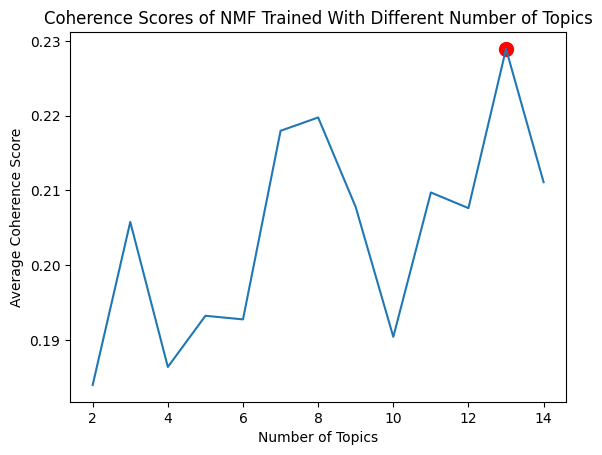

In [16]:
import matplotlib.pyplot as plt

plt.plot(np.arange(2,15), scores)
plt.xlabel('Number of Topics')
plt.ylabel('Average Coherence Score')
plt.title('Coherence Scores of NMF Trained With Different Number of Topics')
plt.scatter(best_model.n_components, scores[best_model.n_components -2], c='red', marker='o', s=100)